In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import sys
import os

from scipy.optimize import curve_fit
from collections import Counter

# Plot settings
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.formatter.useoffset'] = False
# Global font size settings
plt.rcParams['axes.titlesize'] = 18      # Title font size
plt.rcParams['axes.labelsize'] = 14      # X and Y axis labels
plt.rcParams['xtick.labelsize'] = 14     # X tick labels
plt.rcParams['ytick.labelsize'] = 14     # Y tick labels
plt.rcParams['legend.fontsize'] = 14     # Legend text
plt.rcParams['figure.titlesize'] = 18    # Figure title (if using `fig.suptitle`)

In [2]:
import os
os.path.isfile('C2Data/1')

True

# 001 Low Cut Off Frequency

## Cast

**Below plots the median filter in between a "variation bar" where the filterd with the max/min data were used for the upper/lower bounds**

File with most min values: C2Data/15
File with most max values: C2Data/18
File with most median values: C2Data/10


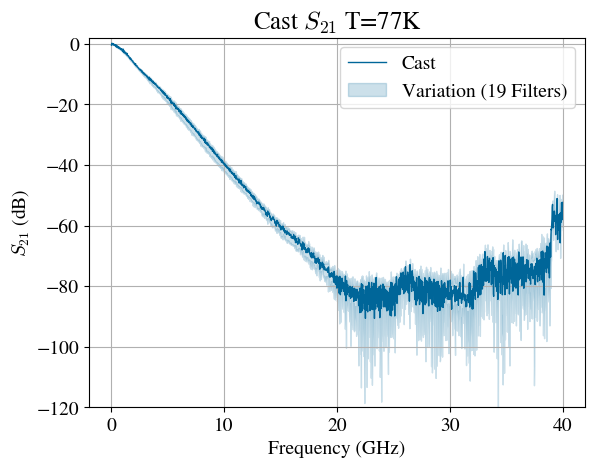

In [3]:
# Load data
#M_files = [f'MData/{i}' for i in range(1, 20)]
#M_data = [np.loadtxt(f, delimiter='\t') for f in M_files]
#B = np.loadtxt('CData/Background', delimiter='\t')
#xB = (B[:,0])/1e9
#yB = (B[:,1])

# Extract frequency (assuming all files have the same x-axis)
#x_vals = M_data[0][:, 0]/1e9

# Stack all y-values for statistical calculations
#y_vals = np.array([M[:, 1] for M in M_data])  # Shape: (19, N)

# Find indices of min, max, and median curves
#min_idx = np.argmin(y_vals, axis=0)  # Indices of min values at each frequency
#max_idx = np.argmax(y_vals, axis=0)  # Indices of max values at each frequency
#median_idx = np.argsort(y_vals, axis=0)[len(M_data) // 2]  # Indices of median values

# Convert dataset indices to filenames
#min_files = [M_files[i] for i in min_idx]
#max_files = [M_files[i] for i in max_idx]
#median_files = [M_files[i] for i in median_idx]

# Find the most frequently occurring file in each category
#most_common_min_file = Counter(min_files).most_common(1)[0][0]
#most_common_max_file = Counter(max_files).most_common(1)[0][0]
#most_common_median_file = Counter(median_files).most_common(1)[0][0]

# Print the files
#print("File with most min values:", most_common_min_file)
#print("File with most max values:", most_common_max_file)
#print("File with most median values:", most_common_median_file)

# Get the dataset that corresponds to min, max, and median
#y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
#y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
#y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

# Plot settings
#plt.figure(figsize=[11, 5])

# Plot median dataset
#plt.plot(x_vals, y_median_curve, color='blue', label='Median')
#plt.plot(x_vals, y_median_curve, color=plt.cm.ocean(0.1), label='Machined')  # Mid-point of 'viridis'


# Fill between min and max curves
#plt.fill_between(x_vals, y_min_curve, y_max_curve, color=plt.cm.ocean(0.1), alpha=0.2, label='Variation (19 Filters)')

# Plot Background
#plt.plot(xB, yB, color='black', label='Background')

# Grid and labels
#plt.grid(which='both')
#plt.ticklabel_format(useOffset=False)
#plt.xlabel("Frequency (GHz)")
#plt.ylabel("$S_{21}$ (dB)")
#plt.ylim(-120, 5)
#plt.ylim(-40,1)
#plt.xlim(0,10)

# Show legend
#plt.legend(loc='upper right');

#plt.savefig("Mach001S21",facecolor="w")

# Load data
C_files = [f'C2Data/{i}' for i in range(1, 20)]
C_data = [np.loadtxt(f, delimiter='\t') for f in C_files]
B = np.loadtxt('CData/Background', delimiter='\t')
xB = (B[:,0])/1e9
yB = (B[:,1])

# Extract frequency (assuming all files have the same x-axis)
x_vals = C_data[0][:, 0]/1e9

# Stack all y-values for statistical calculations
y_vals = np.array([C[:, 1] for C in C_data])  # Shape: (19, N)

# Find indices of min, max, and median curves
min_idx = np.argmin(y_vals, axis=0)  # Indices of min values at each frequency
max_idx = np.argmax(y_vals, axis=0)  # Indices of max values at each frequency
median_idx = np.argsort(y_vals, axis=0)[len(C_data) // 2]  # Indices of median values

# Convert dataset indices to filenames
min_files = [C_files[i] for i in min_idx]
max_files = [C_files[i] for i in max_idx]
median_files = [C_files[i] for i in median_idx]

# Find the most frequently occurring file in each category
most_common_min_file = Counter(min_files).most_common(1)[0][0]
most_common_max_file = Counter(max_files).most_common(1)[0][0]
most_common_median_file = Counter(median_files).most_common(1)[0][0]

# Print the files
print("File with most min values:", most_common_min_file)
print("File with most max values:", most_common_max_file)
print("File with most median values:", most_common_median_file)

# Get the dataset that corresponds to min, max, and median
y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

plt.figure()#figsize=[11, 5])

# Plot median dataset
plt.plot(x_vals, y_median_curve, color=plt.cm.ocean(0.6), label='Cast')  # Mid-point of 'viridis'

# Fill between min and max curves
plt.fill_between(x_vals, y_min_curve, y_max_curve, color=plt.cm.ocean(0.6), alpha=0.2, label='Variation (19 Filters)')

# Plot Background
#plt.plot(xB, yB, color='black', label='Background')

# Grid and labels
plt.grid(which='both')
plt.ticklabel_format(useOffset=False)
plt.title("Cast $S_{21}$ T=77K")
plt.xlabel("Frequency (GHz)")
plt.ylabel("$S_{21}$ (dB)")
plt.ylim(-120, 2)
#plt.ylim(-3,1)
#plt.xlim(0,1)

# Show legend
plt.legend(loc='upper right');

plt.savefig("001CastS2177K.jpg",facecolor="w")


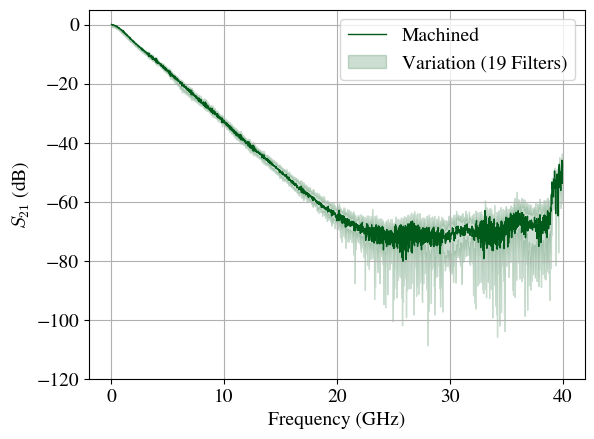

In [4]:
# Load data
M_files = [f'MData/{i}' for i in range(1, 20)]
M_data = [np.loadtxt(f, delimiter='\t') for f in M_files]
B = np.loadtxt('CData/Background', delimiter='\t')
xB = (B[:,0])/1e9
yB = (B[:,1])

# Extract frequency (assuming all files have the same x-axis)
x_vals = M_data[0][:, 0]/1e9

# Stack all y-values for statistical calculations
y_vals = np.array([M[:, 1] for M in M_data])  # Shape: (19, N)

# Find indices of min, max, and median curves
min_idx = np.argmin(y_vals, axis=0)  # Indices of min values at each frequency
max_idx = np.argmax(y_vals, axis=0)  # Indices of max values at each frequency
median_idx = np.argsort(y_vals, axis=0)[len(M_data) // 2]  # Indices of median values

# Convert dataset indices to filenames
min_files = [M_files[i] for i in min_idx]
max_files = [M_files[i] for i in max_idx]
median_files = [M_files[i] for i in median_idx]

# Find the most frequently occurring file in each category
most_common_min_file = Counter(min_files).most_common(1)[0][0]
most_common_max_file = Counter(max_files).most_common(1)[0][0]
most_common_median_file = Counter(median_files).most_common(1)[0][0]

# Print the files
#print("File with most min values:", most_common_min_file)
#print("File with most max values:", most_common_max_file)
#print("File with most median values:", most_common_median_file)

# Get the dataset that corresponds to min, max, and median
y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

# Plot settings
plt.figure()#figsize=[11, 5])

# Plot median dataset
#plt.plot(x_vals, y_median_curve, color='blue', label='Median')
plt.plot(x_vals, y_median_curve, color=plt.cm.ocean(0.1), label='Machined')  # Mid-point of 'viridis'


# Fill between min and max curves
plt.fill_between(x_vals, y_min_curve, y_max_curve, color=plt.cm.ocean(0.1), alpha=0.2, label='Variation (19 Filters)')

# Plot Background
#plt.plot(xB, yB, color='black', label='Background')

# Grid and labels
plt.grid(which='both')
plt.ticklabel_format(useOffset=False)
plt.xlabel("Frequency (GHz)")
plt.ylabel("$S_{21}$ (dB)")
plt.ylim(-120, 5)
#plt.ylim(-40,1)
#plt.xlim(0,10)

# Show legend
plt.legend(loc='upper right');

plt.savefig("Mach001S21.jpg",facecolor="w")

File with most min values: MData/10
File with most max values: MData/2
File with most median values: MData/19
File with most min values: C2Data/15
File with most max values: C2Data/18
File with most median values: C2Data/10


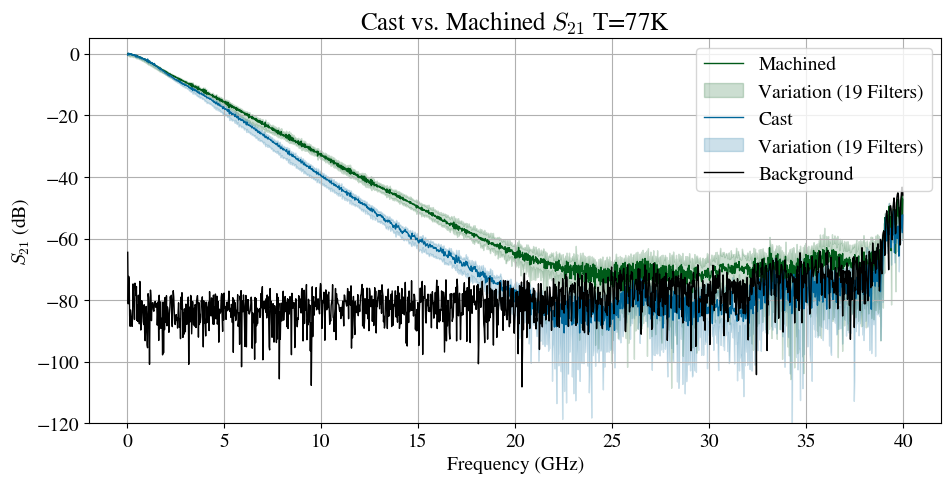

In [5]:
# Load data
M_files = [f'MData/{i}' for i in range(1, 20)]
M_data = [np.loadtxt(f, delimiter='\t') for f in M_files]
#B = np.loadtxt('CData/Background', delimiter='\t')
#xB = (B[:,0])/1e9
#yB = (B[:,1])

# Extract frequency (assuming all files have the same x-axis)
x_vals = M_data[0][:, 0]/1e9

# Stack all y-values for statistical calculations
y_vals = np.array([M[:, 1] for M in M_data])  # Shape: (19, N)

# Find indices of min, max, and median curves
min_idx = np.argmin(y_vals, axis=0)  # Indices of min values at each frequency
max_idx = np.argmax(y_vals, axis=0)  # Indices of max values at each frequency
median_idx = np.argsort(y_vals, axis=0)[len(M_data) // 2]  # Indices of median values

# Convert dataset indices to filenames
min_files = [M_files[i] for i in min_idx]
max_files = [M_files[i] for i in max_idx]
median_files = [M_files[i] for i in median_idx]

# Find the most frequently occurring file in each category
most_common_min_file = Counter(min_files).most_common(1)[0][0]
most_common_max_file = Counter(max_files).most_common(1)[0][0]
most_common_median_file = Counter(median_files).most_common(1)[0][0]

# Print the files
print("File with most min values:", most_common_min_file)
print("File with most max values:", most_common_max_file)
print("File with most median values:", most_common_median_file)

# Get the dataset that corresponds to min, max, and median
y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

# Plot settings
plt.figure(figsize=[11, 5])

# Plot median dataset
#plt.plot(x_vals, y_median_curve, color='blue', label='Median')
plt.plot(x_vals, y_median_curve, color=plt.cm.ocean(0.1), label='Machined')  # Mid-point of 'viridis'


# Fill between min and max curves
plt.fill_between(x_vals, y_min_curve, y_max_curve, color=plt.cm.ocean(0.1), alpha=0.2, label='Variation (19 Filters)')

# Plot Background
#plt.plot(xB, yB, color='black', label='Background')

# Grid and labels
plt.grid(which='both')
plt.ticklabel_format(useOffset=False)
plt.xlabel("Frequency (GHz)")
plt.ylabel("$S_{21}$ (dB)")
#plt.ylim(-120, 5)
#plt.ylim(-40,1)
#plt.xlim(0,10)

# Show legend
plt.legend(loc='upper right');

#plt.savefig("Mach001S21",facecolor="w")

# Load data
C_files = [f'C2Data/{i}' for i in range(1, 20)]
C_data = [np.loadtxt(f, delimiter='\t') for f in C_files]
#B = np.loadtxt('CData/Background', delimiter='\t')
#xB = (B[:,0])/1e9
#yB = (B[:,1])

# Extract frequency (assuming all files have the same x-axis)
x_vals = C_data[0][:, 0]/1e9

# Stack all y-values for statistical calculations
y_vals = np.array([C[:, 1] for C in C_data])  # Shape: (19, N)

# Find indices of min, max, and median curves
min_idx = np.argmin(y_vals, axis=0)  # Indices of min values at each frequency
max_idx = np.argmax(y_vals, axis=0)  # Indices of max values at each frequency
median_idx = np.argsort(y_vals, axis=0)[len(C_data) // 2]  # Indices of median values

# Convert dataset indices to filenames
min_files = [C_files[i] for i in min_idx]
max_files = [C_files[i] for i in max_idx]
median_files = [C_files[i] for i in median_idx]

# Find the most frequently occurring file in each category
most_common_min_file = Counter(min_files).most_common(1)[0][0]
most_common_max_file = Counter(max_files).most_common(1)[0][0]
most_common_median_file = Counter(median_files).most_common(1)[0][0]

# Print the files
print("File with most min values:", most_common_min_file)
print("File with most max values:", most_common_max_file)
print("File with most median values:", most_common_median_file)

# Get the dataset that corresponds to min, max, and median
y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

# Plot median dataset
plt.plot(x_vals, y_median_curve, color=plt.cm.ocean(0.6), label='Cast')  # Mid-point of 'viridis'

# Fill between min and max curves
plt.fill_between(x_vals, y_min_curve, y_max_curve, color=plt.cm.ocean(0.6), alpha=0.2, label='Variation (19 Filters)')

# Plot Background
plt.plot(xB, yB, color='black', label='Background')

# Grid and labels
plt.ticklabel_format(useOffset=False)
plt.title("Cast vs. Machined $S_{21}$ T=77K")
plt.xlabel("Frequency (GHz)")
plt.ylabel("$S_{21}$ (dB)")
plt.ylim(-120, 5)
#plt.xlim(0,10)

# Show legend
plt.legend(loc='upper right');

#plt.savefig("001CastVsMachS2177KwithB.jpg",facecolor="w")


File with most min values: C2Data/15
File with most max values: C2Data/18
File with most median values: C2Data/10
Mean at 10 GHz: -39.9125 dB
Log-variance at 10 GHz: -94.0031 dB
Linear variance at 10 GHz: 3.9782e-10
CV = 19.55%


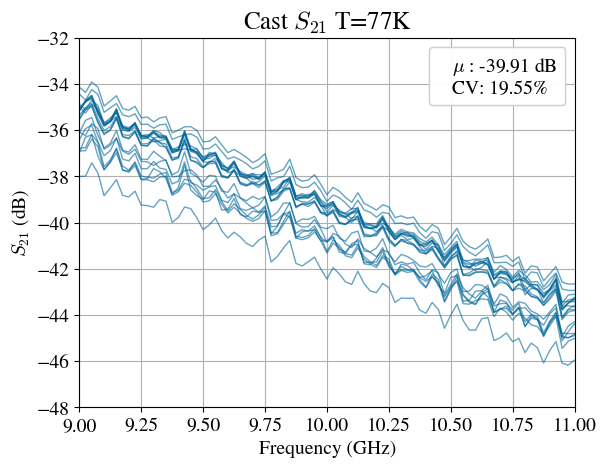

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load raw data files
C_files = [f'C2Data/{i}' for i in range(1, 20)]
C_data = [np.loadtxt(f, delimiter='\t') for f in C_files]
B = np.loadtxt('CData/Background', delimiter='\t')
xB = (B[:,0])/1e9
yB = (B[:,1])

# Frequency axis (GHz)
x_vals = C_data[0][:, 0] / 1e9
xB = B[:, 0] / 1e9
yB = B[:, 1]

# Stack all y-values from raw data
y_vals = np.array([C[:, 1] for C in C_data])  # Shape: (19, N)

# Statistical analysis: index of min, max, and median curves
min_idx = np.argmin(y_vals, axis=0)
max_idx = np.argmax(y_vals, axis=0)
median_idx = np.argsort(y_vals, axis=0)[len(M_data) // 2]

# Track which files are most frequently min, max, median
min_files = [C_files[i] for i in min_idx]
max_files = [C_files[i] for i in max_idx]
median_files = [C_files[i] for i in median_idx]

# Report most common contributors
print("File with most min values:", Counter(min_files).most_common(1)[0][0])
print("File with most max values:", Counter(max_files).most_common(1)[0][0])
print("File with most median values:", Counter(median_files).most_common(1)[0][0])

# Get the actual curves
y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

# Plot settings
plt.figure()#figsize=(11, 5))

# Define the frequency at which we want to analyze
target_frequency = 10  # in GHz
fit_values_at_target = []

# Set a single color for all traces
uniform_color = plt.cm.ocean(0.6)

# Plot each raw trace and extract value at target frequency
for file_name, data in zip(C_files, C_data):
    x_data = data[:, 0] / 1e9
    y_data = data[:, 1]
    plt.plot(x_data, y_data, color=uniform_color, alpha=0.6)

    if np.min(x_data) <= target_frequency <= np.max(x_data):
        fit_values_at_target.append(np.interp(target_frequency, x_data, y_data))

# Perform statistical analysis at target frequency
if len(fit_values_at_target) > 1:
    fit_values_at_target_linear = 10 ** (np.array(fit_values_at_target) / 10)
    mean_at_target_linear = np.mean(fit_values_at_target_linear)
    variance_at_target_linear = np.var(fit_values_at_target_linear)
    CV = 100 * (np.sqrt(variance_at_target_linear) / mean_at_target_linear)
    #CV = np.sqrt(variance_at_target_linear) / mean_at_target_linear

    mean_at_target_db = 10 * np.log10(mean_at_target_linear)
    variance_at_target_db = 10 * np.log10(variance_at_target_linear)

    print(f'Mean at {target_frequency} GHz: {mean_at_target_db:.4f} dB')
    print(f'Log-variance at {target_frequency} GHz: {variance_at_target_db:.4f} dB')
    print(f'Linear variance at {target_frequency} GHz: {variance_at_target_linear:.4e}')
    print(f'CV = {CV:.2f}%')
    legend_text = f'$\mu$ : {mean_at_target_db:.2f} dB\nCV: {CV:.2f}%'

else:
    legend_text = "Not enough data"
    print("Not enough valid fit values to calculate statistics.")

stat_legend = plt.legend([plt.Line2D([0], [0], color='white', lw=0)], 
                         [legend_text], loc='upper right', handlelength=0)
plt.gca().add_artist(stat_legend)

# Final plot settings
plt.grid(which='both')
plt.ticklabel_format(useOffset=False)
plt.title("Cast $S_{21}$ T=77K")
plt.xlabel("Frequency (GHz)")
plt.ylabel("$S_{21}$ (dB)")
plt.ylim(-48, -32)
plt.xlim(9, 11)

plt.savefig("001CVar77K_raw.jpg", facecolor="w")
plt.show()


# Machined

File with most min values: MData/10
File with most max values: MData/2
File with most median values: MData/19


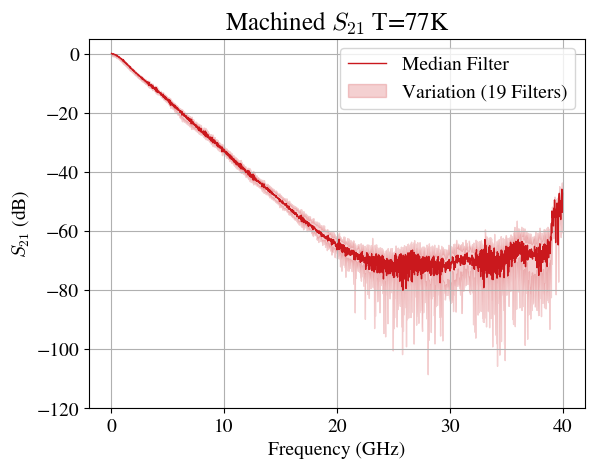

In [7]:
# Load data
M_files = [f'MData/{i}' for i in range(1, 20)]
M_data = [np.loadtxt(f, delimiter='\t') for f in M_files]
B = np.loadtxt('CData/Background', delimiter='\t')
xB = (B[:,0])/1e9
yB = (B[:,1])

# Extract frequency (assuming all files have the same x-axis)
x_vals = M_data[0][:, 0]/1e9

# Stack all y-values for statistical calculations
y_vals = np.array([M[:, 1] for M in M_data])  # Shape: (19, N)

# Find indices of min, max, and median curves
min_idx = np.argmin(y_vals, axis=0)  # Indices of min values at each frequency
max_idx = np.argmax(y_vals, axis=0)  # Indices of max values at each frequency
median_idx = np.argsort(y_vals, axis=0)[len(M_data) // 2]  # Indices of median values

# Convert dataset indices to filenames
min_files = [M_files[i] for i in min_idx]
max_files = [M_files[i] for i in max_idx]
median_files = [M_files[i] for i in median_idx]

# Find the most frequently occurring file in each category
most_common_min_file = Counter(min_files).most_common(1)[0][0]
most_common_max_file = Counter(max_files).most_common(1)[0][0]
most_common_median_file = Counter(median_files).most_common(1)[0][0]

# Print the files
print("File with most min values:", most_common_min_file)
print("File with most max values:", most_common_max_file)
print("File with most median values:", most_common_median_file)

# Get the dataset that corresponds to min, max, and median
y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

# Plot settings
plt.figure()#figsize=[11, 5])

# Plot median dataset
#plt.plot(x_vals, y_median_curve, color='blue', label='Median')
plt.plot(x_vals, y_median_curve, color=plt.cm.Reds(0.75), label='Median Filter')  # Mid-point of 'viridis'


# Fill between min and max curves
plt.fill_between(x_vals, y_min_curve, y_max_curve, color=plt.cm.Reds(0.75), alpha=0.2, label='Variation (19 Filters)')

# Plot Background
#plt.plot(xB, yB, color='black', label='Background')

# Grid and labels
plt.grid(which='both')
plt.ticklabel_format(useOffset=False)
plt.title("Machined $S_{21}$ T=77K")
plt.xlabel("Frequency (GHz)")
plt.ylabel("$S_{21}$ (dB)")
plt.ylim(-120, 5)
#plt.ylim(-40,1)
#plt.xlim(0,10)

# Show legend
plt.legend(loc='upper right');

#plt.savefig("Mach001S21",facecolor="w")

File with most min values: MData/10
File with most max values: MData/2
File with most median values: MData/19
Mean at 10 GHz: -32.3342 dB
Log-variance at 10 GHz: -81.9468 dB
Linear variance at 10 GHz: 6.3874e-09
CV = 13.68%


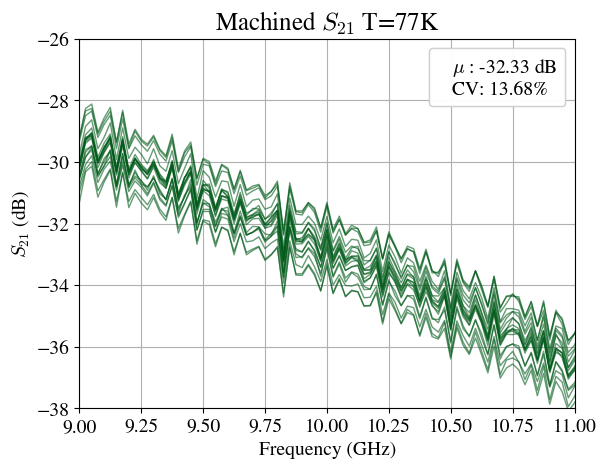

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load raw data files
M_files = [f'MData/{i}' for i in range(1, 20)]
M_data = [np.loadtxt(f, delimiter='\t') for f in M_files]
B = np.loadtxt('CData/Background', delimiter='\t')

# Frequency axis (GHz)
x_vals = M_data[0][:, 0] / 1e9
xB = B[:, 0] / 1e9
yB = B[:, 1]

# Stack all y-values from raw data
y_vals = np.array([M[:, 1] for M in M_data])  # Shape: (19, N)

# Statistical analysis: index of min, max, and median curves
min_idx = np.argmin(y_vals, axis=0)
max_idx = np.argmax(y_vals, axis=0)
median_idx = np.argsort(y_vals, axis=0)[len(M_data) // 2]

# Track which files are most frequently min, max, median
min_files = [M_files[i] for i in min_idx]
max_files = [M_files[i] for i in max_idx]
median_files = [M_files[i] for i in median_idx]

# Report most common contributors
print("File with most min values:", Counter(min_files).most_common(1)[0][0])
print("File with most max values:", Counter(max_files).most_common(1)[0][0])
print("File with most median values:", Counter(median_files).most_common(1)[0][0])

# Get the actual curves
y_min_curve = y_vals[min_idx, np.arange(y_vals.shape[1])]
y_max_curve = y_vals[max_idx, np.arange(y_vals.shape[1])]
y_median_curve = y_vals[median_idx, np.arange(y_vals.shape[1])]

# Plot settings
plt.figure()#figsize=(11, 5))

# Define the frequency at which we want to analyze
target_frequency = 10  # in GHz
fit_values_at_target = []

# Set a single color for all traces
uniform_color = plt.cm.ocean(0.1)

# Plot each raw trace and extract value at target frequency
for file_name, data in zip(M_files, M_data):
    x_data = data[:, 0] / 1e9
    y_data = data[:, 1]
    plt.plot(x_data, y_data, color=uniform_color, alpha=0.6)

    if np.min(x_data) <= target_frequency <= np.max(x_data):
        fit_values_at_target.append(np.interp(target_frequency, x_data, y_data))

# Perform statistical analysis at target frequency
if len(fit_values_at_target) > 1:
    fit_values_at_target_linear = 10 ** (np.array(fit_values_at_target) / 10)
    mean_at_target_linear = np.mean(fit_values_at_target_linear)
    variance_at_target_linear = np.var(fit_values_at_target_linear)
    CV = 100 * (np.sqrt(variance_at_target_linear) / mean_at_target_linear)
    #CV = np.sqrt(variance_at_target_linear) / mean_at_target_linear

    mean_at_target_db = 10 * np.log10(mean_at_target_linear)
    variance_at_target_db = 10 * np.log10(variance_at_target_linear)

    print(f'Mean at {target_frequency} GHz: {mean_at_target_db:.4f} dB')
    print(f'Log-variance at {target_frequency} GHz: {variance_at_target_db:.4f} dB')
    print(f'Linear variance at {target_frequency} GHz: {variance_at_target_linear:.4e}')
    print(f'CV = {CV:.2f}%')
    legend_text = f'$\mu$ : {mean_at_target_db:.2f} dB\nCV: {CV:.2f}%'

else:
    legend_text = "Not enough data"
    print("Not enough valid fit values to calculate statistics.")

stat_legend = plt.legend([plt.Line2D([0], [0], color='white', lw=0)], 
                         [legend_text], loc='upper right', handlelength=0)
plt.gca().add_artist(stat_legend)

# Final plot settings
plt.grid(which='both')
plt.ticklabel_format(useOffset=False)
plt.title("Machined $S_{21}$ T=77K")
plt.xlabel("Frequency (GHz)")
plt.ylabel("$S_{21}$ (dB)")
plt.ylim(-38, -26)
plt.xlim(9, 11)

plt.savefig("001MVar77K_raw.jpg", facecolor="w")
plt.show()
